# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [133]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = "\t")

### Step 4. See the first 10 entries

In [134]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

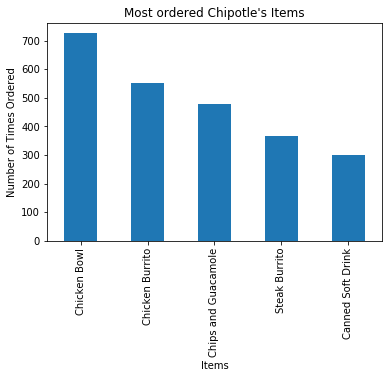

In [135]:
x = chipo.item_name

# counter creates a dictionary with a count for every entry
letter_counts = Counter(x)

sorted_dict = dict(sorted(letter_counts.items(), key= lambda x: x[1], reverse=True))
df = pd.DataFrame.from_dict(sorted_dict, orient='index')
ax = df[0:5].plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# removing the default legend since it isnt relevant
ax.get_legend().remove()

# show the plot
plt.show()

In [136]:
# first lets' convert the prices to float
dollarize = lambda x: float(x[1:-1])
chipo["item_price"] = chipo["item_price"].apply(dollarize)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [138]:
chipo[chipo["order_id"]==1443]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

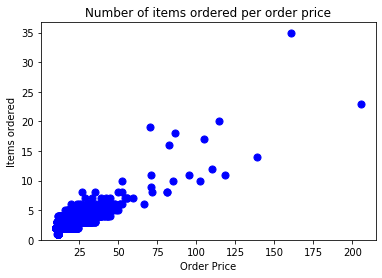

In [143]:
# now as requested
orders = chipo.groupby('order_id').sum()
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'blue')
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

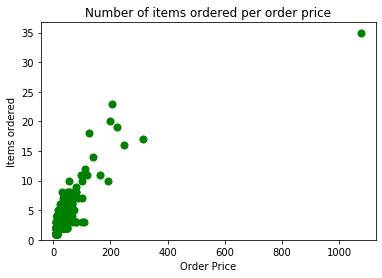

In [173]:
# in this graph the number of items ordered in a unique order is compared with the total price of that order.
chipo_per_order = chipo.copy()
chipo_per_order["item_price"] = chipo_per_order.quantity * chipo_per_order.item_price
chipo_per_order = chipo_per_order.groupby("order_id").sum()
chipo_per_order.rename(columns = {"item_price":"order_price"}, inplace = True)
chipo_per_order
plt.scatter(x = chipo_per_order.order_price, y = chipo_per_order.quantity, s = 50, c = 'green')
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()

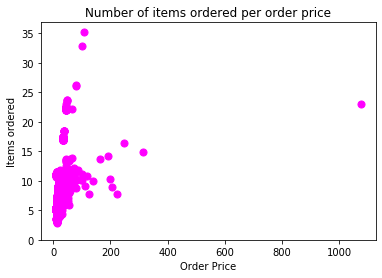

In [186]:
# lets do the same with the average price of a single item in an order! (weighted average?)
chipo_per_order = chipo.copy()
chipo_per_order["unique_items"] = np.ones(len(chipo_per_order))

chipo_per_order["item_price"] = chipo_per_order.quantity * chipo_per_order.item_price
chipo_per_order = chipo_per_order.groupby("order_id").sum()
chipo_per_order.rename(columns = {"item_price":"order_price"}, inplace = True)
chipo_per_order
weighted_avg_price = chipo_per_order.order_price/chipo_per_order.quantity
avg_price = chipo.groupby("order_id").item_price.sum() / chipo_per_order["unique_items"]

x = chipo_per_order.order_price
y = avg_price   # or weighted avg price, it actually doesnt matter

plt.scatter(x,y,s = 50, c = 'magenta')
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()